# Week 6 Assignment - Avocado

## Jeremy Stanton COP 1044

In [22]:
import pandas as pd
import seaborn as sns

In [23]:
avocado = pd.read_csv('avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [24]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [25]:
avocado['Date'] = avocado['Date'].apply(pd.to_datetime)

In [26]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [27]:
avocado_query = avocado.query('year == 2015')[['Date', 'Total Bags', 'Small Bags']]
avocado_query.head()

,Date,Total Bags,Small Bags
0,2015-12-27,8696.87,8603.62
1,2015-12-20,9505.56,9408.07
2,2015-12-13,8145.35,8042.21
3,2015-12-06,5811.16,5677.40
4,2015-11-29,6183.95,5986.26


In [28]:
avocado_long = avocado.melt(id_vars = 'Date', value_vars = ['Total Bags', 'Small Bags'], var_name = 'Bags', value_name = 'Count')
avocado_long

,Date,Bags,Count
0,2015-12-27,Total Bags,8696.87
1,2015-12-20,Total Bags,9505.56
2,2015-12-13,Total Bags,8145.35
3,2015-12-06,Total Bags,5811.16
4,2015-11-29,Total Bags,6183.95
...,...,...,...
36493,2018-02-04,Small Bags,13066.82
36494,2018-01-28,Small Bags,8940.04
36495,2018-01-21,Small Bags,9351.80
36496,2018-01-14,Small Bags,10919.54


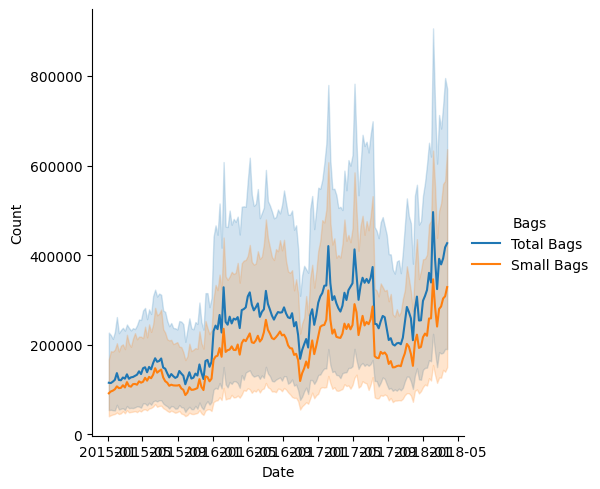

In [29]:
sns.relplot(data = avocado_long, kind = 'line', x = 'Date', y = 'Count', hue = 'Bags')

In [30]:
avocado['Sales Volume'] = pd.qcut(avocado['Total Volume'], q = 4, labels = ['Poor', 'Modest', 'Good', 'Excellent'])
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Sales Volume
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Modest
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Modest
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Good
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Modest
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Modest


<Axes: xlabel='year', ylabel='count'>

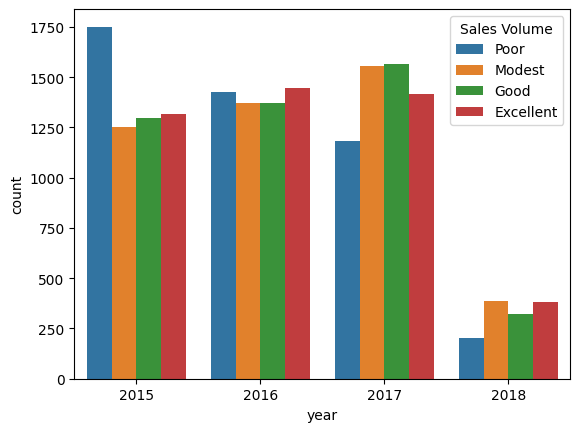

In [31]:
sns.countplot(data = avocado, x = 'year', hue = 'Sales Volume')

In [32]:
avocado_melt_2 = avocado.melt(id_vars = 'year', value_vars = ['Small Bags', 'Large Bags', 'XLarge Bags'], var_name = 'Bags', value_name = 'Count')
avocado_melt_2

,year,Bags,Count
0,2015,Small Bags,8603.62
1,2015,Small Bags,9408.07
2,2015,Small Bags,8042.21
3,2015,Small Bags,5677.40
4,2015,Small Bags,5986.26
...,...,...,...
54742,2018,XLarge Bags,0.00
54743,2018,XLarge Bags,0.00
54744,2018,XLarge Bags,0.00
54745,2018,XLarge Bags,0.00


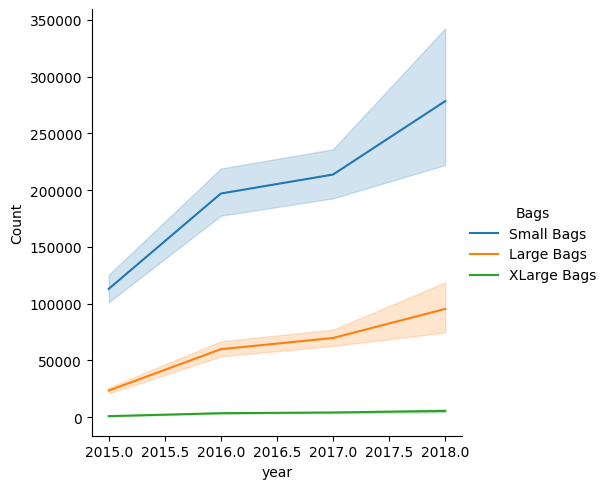

In [33]:
sns.relplot(data = avocado_melt_2, kind = 'line', x = 'year', y = 'Count', hue = 'Bags')

## The best selling bag size is Small